# Data Exploration & Base Analysis

#### Import libraries


In [119]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import os as os
import sys
import itertools

import numpy as np
import pandas as pd

from scipy.stats import kurtosis, skew 
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

%matplotlib inline

from wordcloud import WordCloud, STOPWORDS

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"\\src")

from utils import print_outliers_info

#### Dataset files


In [3]:
# Print file names

print("Dataset files:\n", os.listdir("../data"))

Dataset files:
 ['winemag-data-130k-v2.csv', 'winemag-data-130k-v2.json', 'winemag-data_first150k.csv']


###### 'winemag-data-130k-v2.csv':

- It is the latest dataset extracted by the author on Kaggle.
- This set does not contain duplicates.

#### Loading the dataset & data summary


In [4]:
wines_dataset = pd.read_csv('../data/winemag-data-130k-v2.csv', index_col=0)

print("Dataset Description")
wines_dataset.describe(include = 'all')

Dataset Description


,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
count,129908,129971,92506,129971.000000,120975.000000,129908,108724,50511,103727,98758,129971,129970,129971
unique,43,119955,37979,NaN,NaN,425,1229,17,19,15,118840,707,16757
top,US,"Stalky aromas suggest hay and green herbs, wit...",Reserve,NaN,NaN,California,Napa Valley,Central Coast,Roger Voss,@vossroger,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Pinot Noir,Wines & Winemakers
freq,54504,3,2009,NaN,NaN,36247,4480,11065,25514,25514,11,13272,222
mean,NaN,NaN,NaN,88.447138,35.363389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,3.039730,41.022218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,80.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,86.000000,17.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,88.000000,25.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,91.000000,42.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
wines_dataset.describe()

,points,price
count,129971.000000,120975.000000
mean,88.447138,35.363389
std,3.039730,41.022218
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


In [30]:
print("Dataset shape:\n", wines_dataset.shape)
print("Number of entries:\n", wines_dataset.shape[0])
print("Number of columns/possible features:\n", wines_dataset.shape[1])

nr_rows = wines_dataset.shape[0]
nr_colums = wines_dataset.shape[1]

print("\nCount null values for each column defined by the dataset:\n")
wines_dataset.isnull().sum()

Dataset shape:
 (129971, 13)
Number of entries:
 129971
Number of columns/possible features:
 13

Count null values for each column defined by the dataset:



country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

In [14]:
def print_dataset_summary(dataset):
    print(f"Wine Reviews dataset shape: {dataset.shape}")
    summary = pd.DataFrame(dataset.dtypes, columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name', 'dtypes']]
    summary['Missing'] = dataset.isnull().sum().values    
    summary['Uniques'] = dataset.nunique().values
    summary['First Value'] = dataset.loc[0].values
    summary['Second Value'] = dataset.loc[1].values
    summary['Third Value'] = dataset.loc[2].values

    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(dataset[name].value_counts(normalize=True), base=2), 2) 

    return summary

print_dataset_summary(wines_dataset)

Wine Reviews dataset shape: (129971, 13)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,country,object,63,43,Italy,Portugal,US,2.77
1,description,object,0,119955,"Aromas include tropical fruit, broom, brimston...","This is ripe and fruity, a wine that is smooth...","Tart and snappy, the flavors of lime flesh and...",16.83
2,designation,object,37465,37979,Vulkà Bianco,Avidagos,NaN,13.83
3,points,int64,0,21,87,87,87,3.64
4,price,float64,8996,390,NaN,15,14,5.77
5,province,object,63,425,Sicily & Sardinia,Douro,Oregon,5.05
6,region_1,object,21247,1229,Etna,NaN,Willamette Valley,7.89
7,region_2,object,79460,17,NaN,NaN,Willamette Valley,3.28
8,taster_name,object,26244,19,Kerin O’Keefe,Roger Voss,Paul Gregutt,3.39
9,taster_twitter_handle,object,31213,15,@kerinokeefe,@vossroger,@paulgwine,3.23


#### Column analysis: "Points"

- *Points Distribution*

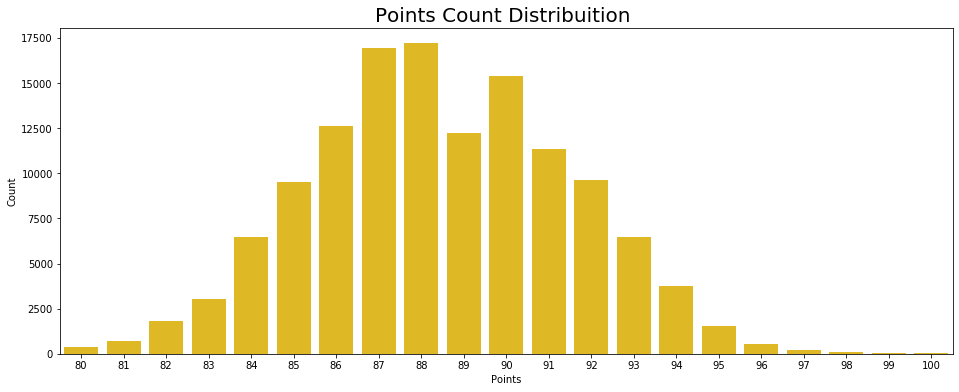

In [29]:
plt.figure(figsize=(16, 6))

colors = itertools.cycle(["r", "b", "g"])

plt.subplot(1,1,1)
graph = sns.countplot(x='points', data=wines_dataset, color=np.random.rand(3,))
graph.set_title("Points Count Distribuition ", fontsize=20)
graph.set_xlabel("Points")
graph.set_ylabel("Count")

plt.show()

- Define new features based on "Points" column and explore those

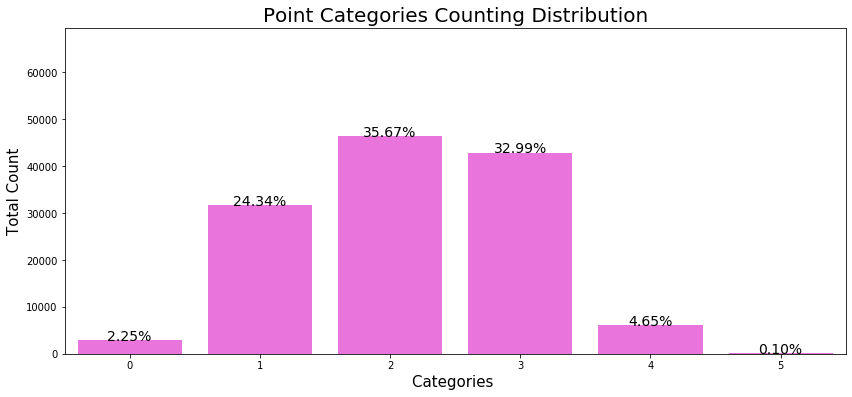

In [37]:
def points_categories(points):
    if points in list(range(80, 83)):
        return 0
    elif points in list(range(83, 87)):
        return 1
    elif points in list(range(87, 90)):
        return 2
    elif points in list(range(90, 94)):
        return 3
    elif points in list(range(94, 98)):
        return 4
    else:
        return 5
    
wines_dataset["points_on_categories"] = wines_dataset["points"].apply(points_categories)

plt.figure(figsize=(14, 6))
graph = sns.countplot(x='points_on_categories', color=np.random.rand(3,), data=wines_dataset)
graph.set_title("Point Categories Counting Distribution", fontsize=20)
graph.set_xlabel("Categories ", fontsize=15)
graph.set_ylabel("Total Count", fontsize=15)

sizes=[]

for x in graph.patches:
    height = x.get_height()
    sizes.append(height)
    graph.text(x.get_x() + x.get_width()/2., height + 3, '{:1.2f}%'.format((height/nr_rows)*100), ha="center", fontsize=14) 
    
graph.set_ylim(0, max(sizes) * 1.5)

plt.show()

- "Points" column outliers

In [55]:
def print_outliers_info(data): 
    data_mean= np.mean(data)
    data_standard_deviation = np.std(data)
    
    cut = data_standard_deviation * 3
    
    lower = data_mean - cut
    upper = data_mean + cut

    outliers_lower = [x for x in data if x < lower]
    outliers_lower_count = len(outliers_lower)
    
    outliers_upper = [x for x in data if x > upper]
    outliers_upper_count = len(outliers_upper)
    
    outliers_total = [x for x in data if x < lower or x > upper]
    outliers_total_count = len(outliers_lower) + len(outliers_upper)

    non_outliers = [x for x in data if x >= lower and x <= upper]
    non_outliers_count = len(data) - outliers_total_count
    
    print("Outliers - total:", outliers_total_count)
    print("Outliers - lower:", outliers_lower_count)
    print("Outliers - upper:", outliers_upper_count)
    print("\nNon-Outliers:", non_outliers_count)
    print("\nOutliers percentage:", round(outliers_total_count / non_outliers_count * 100, 3), "%")
    
    return

print_outliers_info(wines_dataset['points'])

Outliers - total: 129
Outliers - lower: 0
Outliers - upper: 129

Non-Outliers: 129842

Outliers percentage: 0.099 %


#### Column analysis: "Price"

- *Price Distribution*

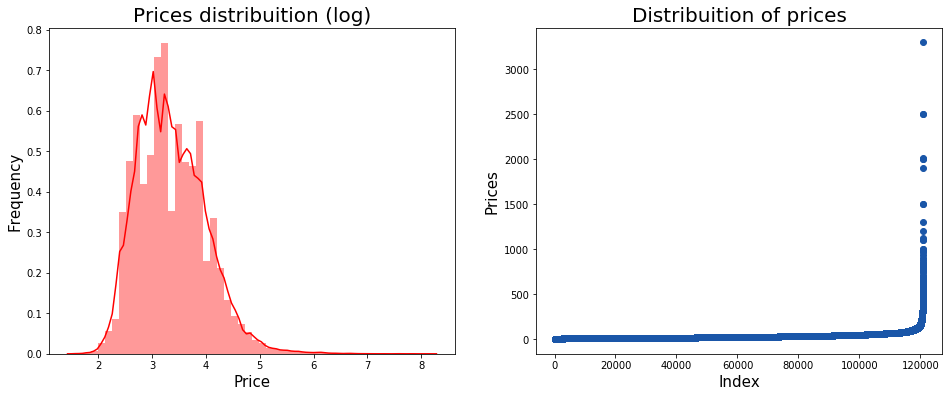

In [46]:
plt.figure(figsize=(16, 6))

graph_1 = plt.subplot(1, 2, 1)
graph_1 = sns.distplot(np.log(wines_dataset['price'].dropna() + 1), color='r')
graph_1.set_title("Prices distribuition (log)", fontsize=20)
graph_1.set_xlabel("Price", fontsize=15)
graph_1.set_ylabel("Frequency", fontsize=15)

plt.subplot(1, 2, 2)
plt.scatter(range(wines_dataset.shape[0]), np.sort(wines_dataset.price.values), color=np.random.rand(3,))
plt.xlabel('Index', fontsize=15)
plt.ylabel('Prices', fontsize=15)
plt.title("Distribuition of prices", fontsize=20)

plt.show()

- "Price" column outliers

In [56]:
print_outliers_info(wines_dataset['price'])

Outliers - total: 1177
Outliers - lower: 0
Outliers - upper: 1177

Non-Outliers: 128794

Outliers percentage: 0.914 %


#### Correlation between points and prices


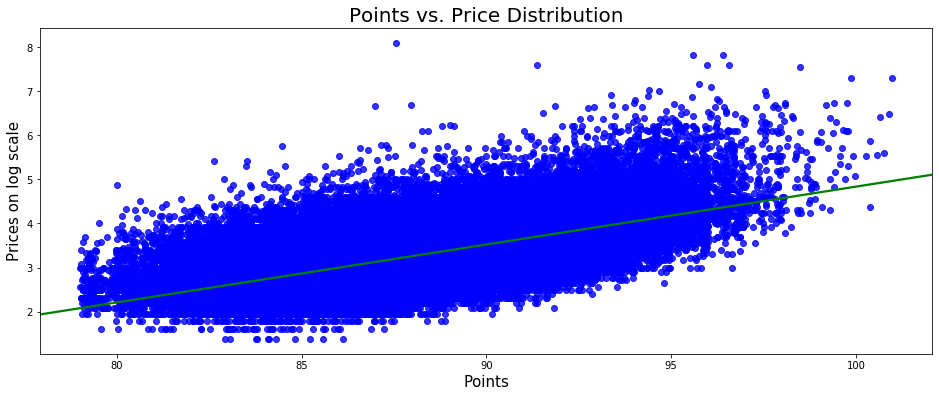

In [65]:
wines_dataset['price_scaled_as_log'] = np.log(wines_dataset['price'])

plt.figure(figsize=(16, 6))

graph = sns.regplot(x='points', y='price_scaled_as_log', 
                    data=wines_dataset, line_kws={'color':'green'},
                    x_jitter=True, fit_reg=True, color='b')
graph.set_title("Points vs. Price Distribution", fontsize=20)
graph.set_xlabel("Points", fontsize= 15)
graph.set_ylabel("Prices on log scale", fontsize= 15)

plt.show()

#### Geo analysis

- *Countries Distribution*

Number of countries: 43


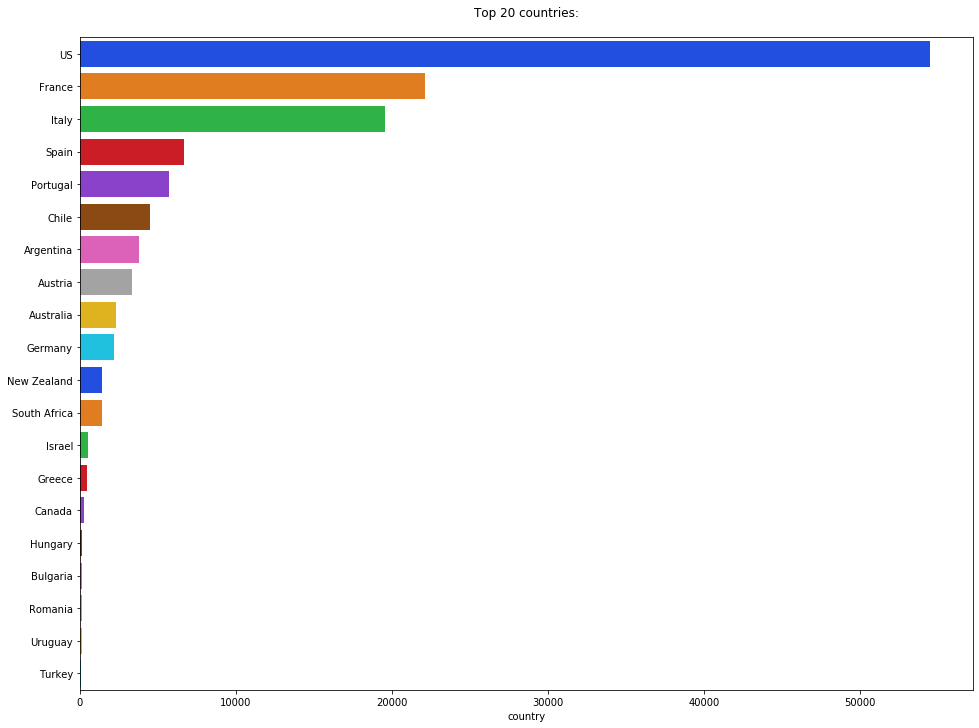

In [69]:
print("Number of countries:", wines_dataset['country'].nunique())

plt.figure(figsize=(16, 12))

top_20_countries = wines_dataset['country'].value_counts().to_frame()[0:20]

sns.barplot(x=top_20_countries['country'], y=top_20_countries.index, data=top_20_countries, palette='bright', orient='h')
plt.title("Top 20 countries:\n");

plt.show()

- Top Countries (by price)

In [117]:
wines_dataset_grouped_by_country = wines_dataset.groupby(['country'])['price', 'points'].mean().reset_index()
# wines_dataset_grouped_by_country [['country', 'price']].head(n=16)

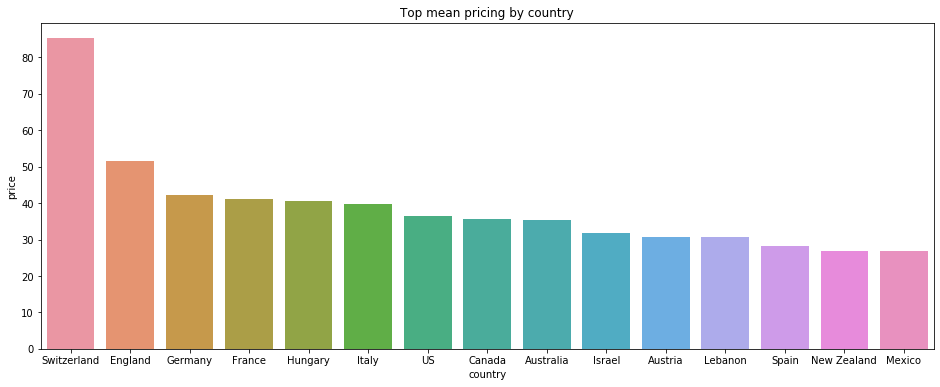

In [110]:
plt.figure(figsize = (16, 6))
plt.title('Top mean pricing by country')
sns.barplot(x='country', y="price", data=wines_dataset_grouped_by_country.sort_values('price', ascending=False).head(15))
locs, labels = plt.xticks()
plt.show()

- Top Countries (by points)

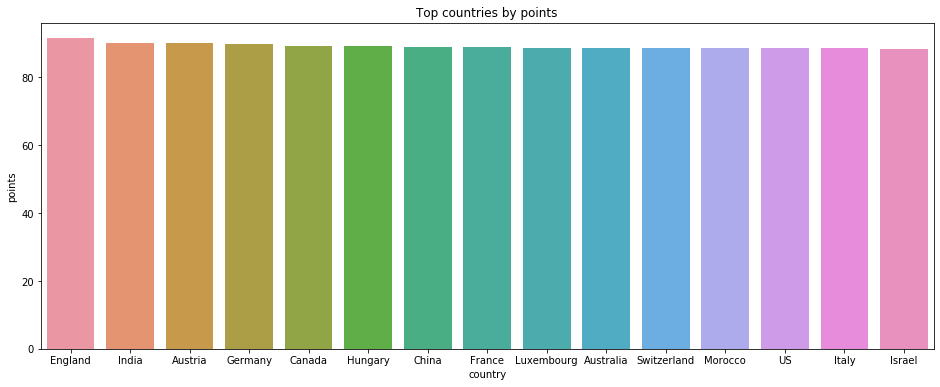

In [81]:
plt.figure(figsize = (16, 6))
plt.title('Top countries by points')
sns.barplot(x='country', y='points', data=wines_dataset_grouped_by_country.sort_values('points', ascending=False).head(15))
locs, labels = plt.xticks()
plt.show()

- Top Countries (by price/points ratio)

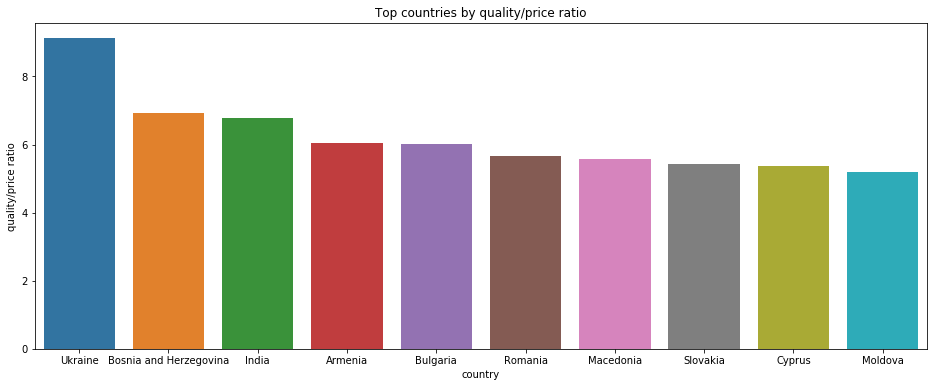

In [92]:
wines_dataset_grouped_by_country['quality/price ratio'] = wines_dataset_grouped_by_country['points'] / wines_dataset_grouped_by_country['price']

wines_dataset_grouped_by_country = wines_dataset_grouped_by_country.sort_values('quality/price ratio', ascending=False)[['country', 'quality/price ratio']]

plt.figure(figsize = (16, 6))
plt.title('Top countries by quality/price ratio')
sns.barplot(x='country',
            y='quality/price ratio',
            data=wines_dataset_grouped_by_country.head(10))
locs, labels = plt.xticks()
plt.show()

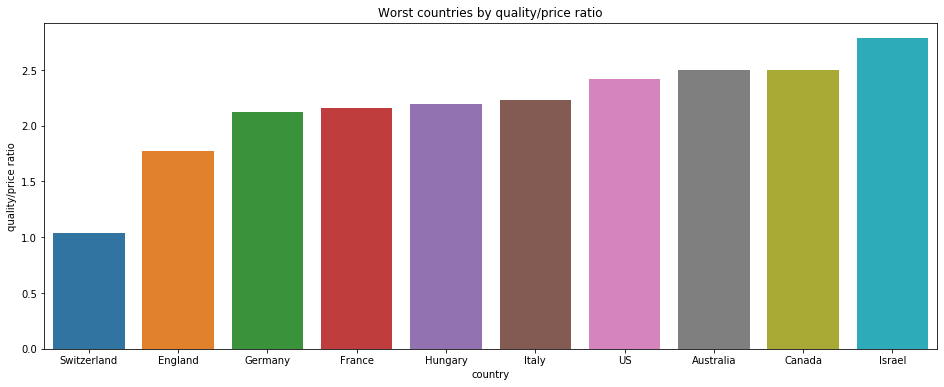

In [94]:
wines_dataset_grouped_by_country = wines_dataset_grouped_by_country.sort_values('quality/price ratio', ascending=True)[['country', 'quality/price ratio']]

plt.figure(figsize = (16, 6))
plt.title('Worst countries by quality/price ratio')
sns.barplot(x='country',
            y='quality/price ratio',
            data=wines_dataset_grouped_by_country.head(10))
locs, labels = plt.xticks()
plt.show()

#### Column analysis: "Description"

- *Some interesting word clouds*

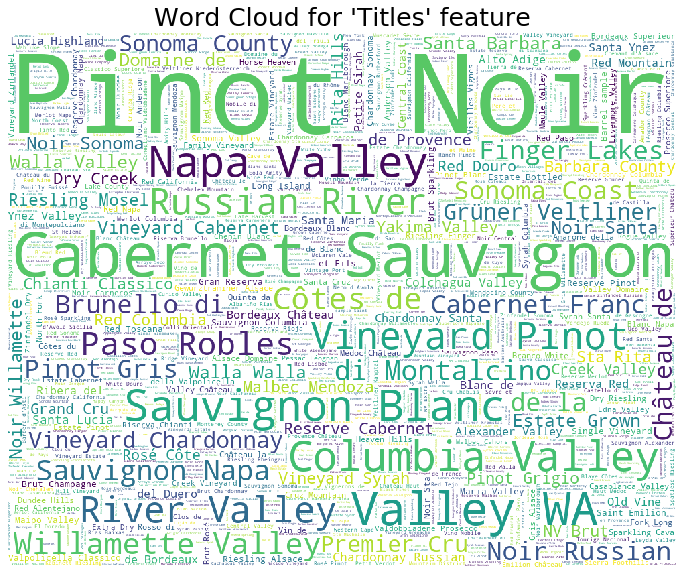

In [121]:
stopwords = set(STOPWORDS)

wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=1500,
        max_font_size=200, 
        width=1000, 
        height=800,
        random_state=42,
    ).generate(" ".join(wines_dataset['title'].astype(str)))

print(wordcloud)
fig = plt.figure(figsize = (12, 14))
plt.imshow(wordcloud)
plt.title("Word Cloud for 'Titles' feature", fontsize=20)
plt.axis('off')
plt.show()

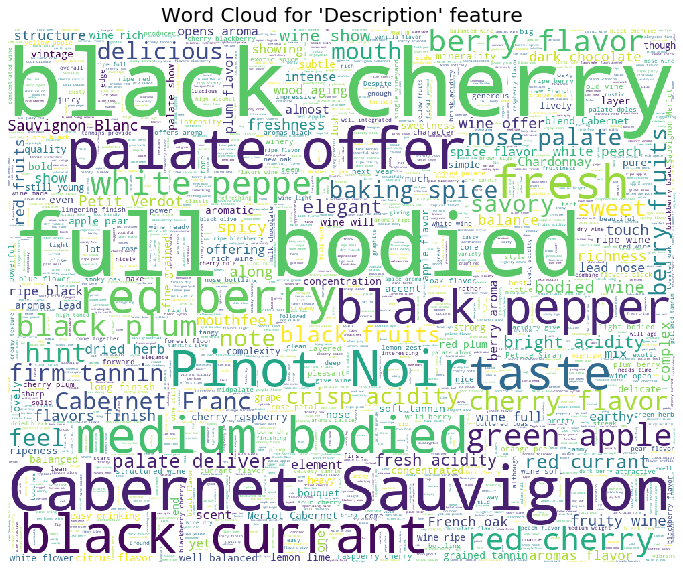

In [123]:
stopwords = set(STOPWORDS)

newStopWords = ['fruit', "Drink", "now"]

stopwords.update(newStopWords)

wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=1500,
        max_font_size=200, 
        width=1000, 
        height=800,
        random_state=42,
    ).generate(" ".join(wines_dataset['description'].astype(str)))

print(wordcloud)
fig = plt.figure(figsize = (12, 14))
plt.imshow(wordcloud)
plt.title("Word Cloud for 'Description' feature", fontsize=20)
plt.axis('off')
plt.show()

- *Description length & Points (very interesting feature)*

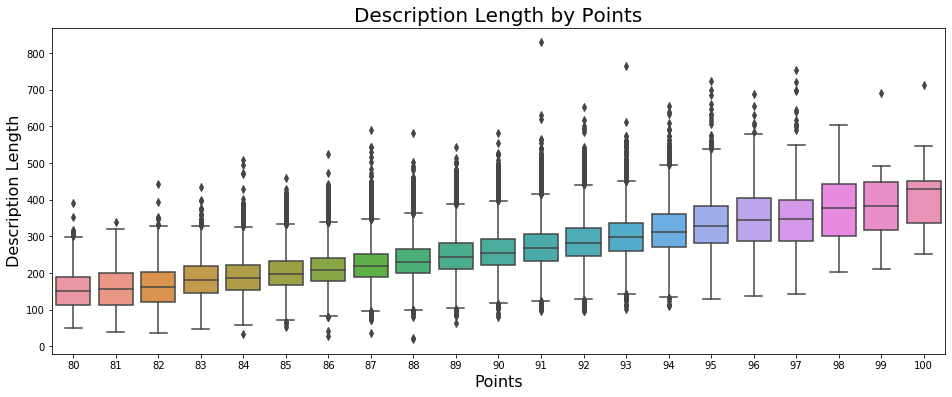

In [125]:
data = wines_dataset.assign(desc_length = wines_dataset['description'].apply(len))

plt.figure(figsize=(16, 6))
graph = sns.boxplot(x='points', y='desc_length', data=data)
graph.set_title('Description Length by Points', fontsize=20)
graph.set_ylabel('Description Length', fontsize = 16) # Y label
graph.set_xlabel('Points', fontsize = 16) # X label
plt.show()